In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

# fit_out and intensities folders
fit_outs_folder = './data/fit_outs/'
Idts_folder = './data/Idts/'

#### Load fit parameters and scan infos

In [2]:
### LOAD SCAN_INFO.CSV ###
scan_info = pd.read_csv('./data/scan_info.csv')
scan_info = scan_info.set_index('scan')

# get file names
Idt_files = os.listdir(Idts_folder)
Idt_files.sort()
Idt_files = [f for f in Idt_files if f.startswith('Idt')]

# load data
Idts = {}
for f in Idt_files:
    # read npz file with numpy
    Idts[f[4:-4]] = np.load(os.path.join(Idts_folder, f), allow_pickle=True)

#### Dose rate definition

In [3]:
A = {8.67: np.pi*7*5, 21.67: np.pi*5.2*4.4, 15.875: np.pi*7.1*3.7}

# density of GeO2
rho = 3.7 * 10**(-4*3) * 10**(-3) # kg/um^3

# Photon flux
phi = {8.67: 2.1e12, 21.67: 8.3e11, 15.875: 9.3e11}

# attenuation length
la = {8.67: 68, 21.67: 113, 15.875: 'x'}

dose_rate= lambda E, d: phi[E]*(1-np.exp(-d/la[E]))*(E*1.6022e-16)/(rho*A[E]*d)

### to be continued ........

In [4]:
It_avg = pd.DataFrame(columns=['ID_sample', 'T', 'It_avg', 'It_std'])

### GeO2_6 Temperature dependence

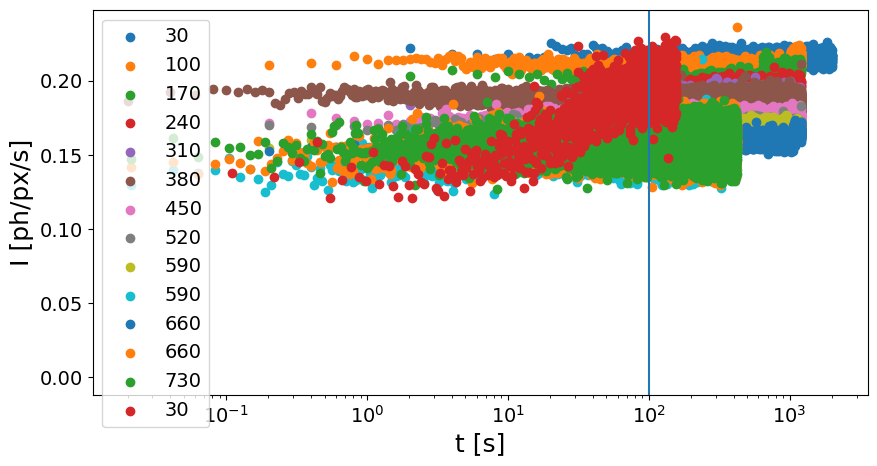

In [5]:
damage_th = 1e2

#################################################
idx_6 = scan_info[(scan_info.ID_sample==6) & (scan_info['Q']==.19) & (scan_info['Note']!='test')].index
#################################################

plt.figure(figsize=(10, 5))
for idx in idx_6:
    t_It = Idts[idx]['t_It']
    It = Idts[idx]['It']
    It_avg.loc[idx] = [scan_info.loc[idx].ID_sample, scan_info.loc[idx]['T'], np.mean(It[t_It>damage_th]), np.std(It[t_It>damage_th])/np.sqrt(len(It[t_It>damage_th]))]
    plt.scatter(t_It, It, label=scan_info.loc[idx]['T'])


plt.axvline(damage_th)
plt.xlabel('t [s]')
plt.ylabel('I [ph/px/s]')
plt.legend()
plt.xscale('log')  

### GeO2_7 Temperature dependence

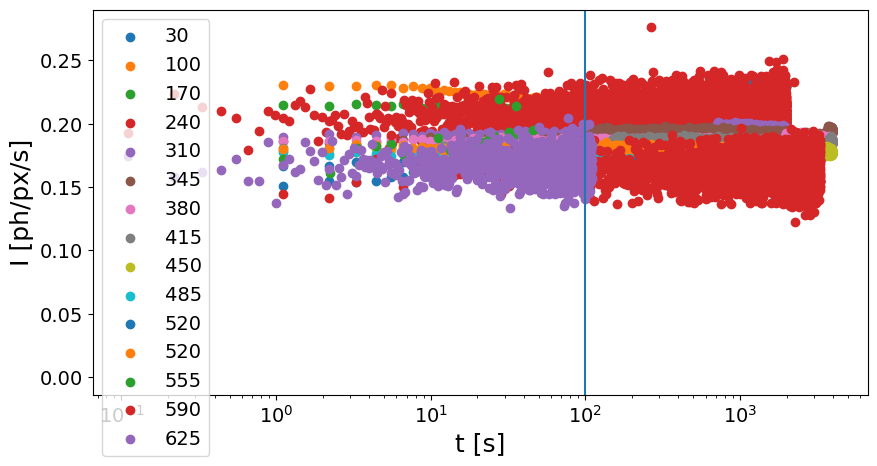

In [6]:
damage_th = 1e2

#################################################
idx_7 = scan_info[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['Note']!='test')].index
#################################################

plt.figure(figsize=(10, 5))
for idx in idx_7:
    t_It = Idts[idx]['t_It']
    It = Idts[idx]['It']
    It_avg.loc[idx] = [scan_info.loc[idx].ID_sample, scan_info.loc[idx]['T'], np.mean(It[t_It>damage_th]), np.std(It[t_It>damage_th])/np.sqrt(len(It[t_It>damage_th]))]
    plt.scatter(t_It, It, label=scan_info.loc[idx]['T'])


plt.axvline(damage_th)
plt.xlabel('t [s]')
plt.ylabel('I [ph/px/s]')
plt.legend()
plt.xscale('log')  

## Results

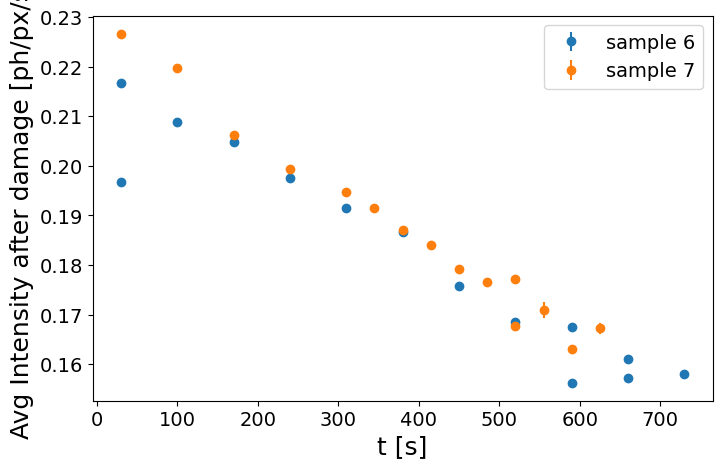

In [7]:
plt.figure(figsize=(8,5))

X = It_avg[It_avg.ID_sample==6]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 6')
X = It_avg[It_avg.ID_sample==7]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 7')

plt.xlabel('t [s]')
plt.ylabel('Avg Intensity after damage [ph/px/s]')
plt.legend()
